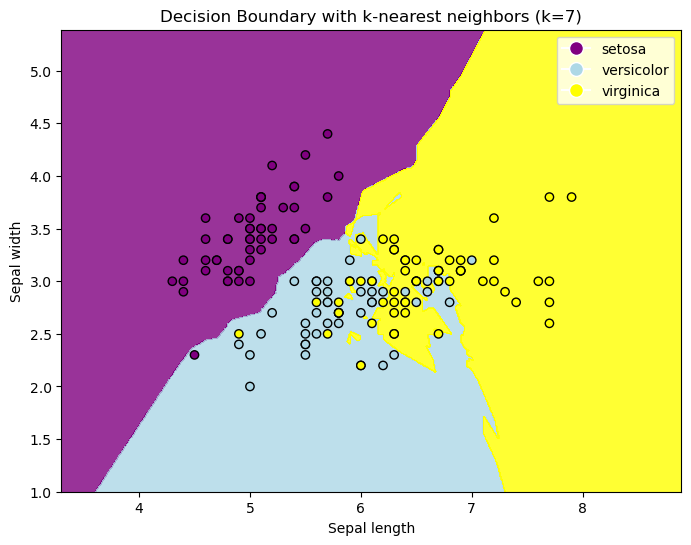

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap

# Load Iris dataset
iris = load_iris()
X = iris.data[:, :2]  # Take the first two features for visualization
y = iris.target

# Fit k-nearest neighbors classifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Plot decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Create a custom colormap for scatter plot
cmap_scatter = ListedColormap(['purple', 'lightblue', 'yellow'])

plt.figure(figsize=(8, 6))

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_scatter)

# Plot scatter points with colors based on class labels
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_scatter, edgecolors='k')

plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision Boundary with k-nearest neighbors (k=7)')

# Create legend
handles = [plt.Line2D([0], [0], marker='o', color='w', markersize=10, markerfacecolor=c, label=iris.target_names[i]) for i, c in enumerate(cmap_scatter.colors)]
plt.legend(handles=handles)

plt.show()
